# Análisis de datos de consultas medicas ambulatorias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

directorio="/home/jorge/proyectos/Datos-Salud/"
archivo="cantidad-consultas-medicas-ambulatorias.csv"



In [2]:
# armo el data set 
consultas=pd.read_csv(directorio + archivo, delimiter=";")
consultas

,jurisdiccion_id,jurisdiccion_nombre,anio_2010,anio_2011,anio_2012,anio_2013,anio_2014,anio_2015,anio_2016,anio_2017,anio_2018,anio_2019,anio_2020,anio_2021,Unnamed: 14
0,2,Ciud. Aut. de Bs As.,9151080,9379171,9300593,9321041,9078805,8911016,8903404,8874282,8862873,8701893,4167912,5369041,NaN
1,6,Buenos Aires,49483322,52019248,53771353,56831224,57482718,60378111,62088351,66233172,78972080,86275852,70335072,92463089,NaN
2,10,Catamarca,1258577,1222244,712217,911620,855402,1192722,870273,708433,604680,717857,478072,531028,NaN
3,14,Cordoba,2534660,3240170,2957082,3282081,3207568,3660167,3092609,3381172,3556888,3610916,1806228,3029372,NaN
4,18,Corrientes,1948750,2151517,2232039,2196510,2062767,2140000,2231559,1812678,1937187,1785149,1034726,1066688,NaN
5,22,Chaco,3194602,3110191,2888145,2953076,2590328,2771994,2691937,2618379,2596926,2488783,1483042,1630080,NaN
6,26,Chubut,1299332,1255038,1134602,1104521,1040539,1051991,1221501,1233690,995903,1066649,467533,648328,NaN
7,30,Entre Rios,2955878,3206351,3234340,3225679,3674969,3250016,3474126,3551019,3419696,3514943,1922289,1766064,NaN
8,34,Formosa,1334618,1319364,1355705,1356930,1315334,1277309,1261435,1234533,1208974,1220908,903072,844701,NaN
9,38,Jujuy,2147273,2347766,2090599,2214291,2051173,2307144,2417079,2914289,2485085,3134729,1974969,2691098,NaN


In [3]:
print("Chequeos básicos para el dataset de consultas:")
print("Número de filas y columnas:", consultas.shape)
print("\nPrimeras filas del dataset:")
print(consultas.head())
print("\nTipos de datos de cada columna:")
print(consultas.dtypes)
print("\nValores faltantes por columna:")
print(consultas.isnull().sum())

Chequeos básicos para el dataset de consultas:
Número de filas y columnas: (24, 15)

Primeras filas del dataset:
   jurisdiccion_id    jurisdiccion_nombre  anio_2010  anio_2011  anio_2012  \
0                2  Ciud.  Aut. de Bs As.    9151080    9379171    9300593   
1                6           Buenos Aires   49483322   52019248   53771353   
2               10              Catamarca    1258577    1222244     712217   
3               14                Cordoba    2534660    3240170    2957082   
4               18             Corrientes    1948750    2151517    2232039   

   anio_2013  anio_2014  anio_2015  anio_2016  anio_2017  anio_2018  \
0    9321041    9078805    8911016    8903404    8874282    8862873   
1   56831224   57482718   60378111   62088351   66233172   78972080   
2     911620     855402    1192722     870273     708433     604680   
3    3282081    3207568    3660167    3092609    3381172    3556888   
4    2196510    2062767    2140000    2231559    1812678    193

In [10]:
# renombrar los nombres de las columnas de anios
consultas.columns=consultas.columns.str.replace("anio_", "", regex=True)
print(consultas)


    jurisdiccion_id    jurisdiccion_nombre      2010      2011      2012  \
0                 2  Ciud.  Aut. de Bs As.   9151080   9379171   9300593   
1                 6           Buenos Aires  49483322  52019248  53771353   
2                10              Catamarca   1258577   1222244    712217   
3                14                Cordoba   2534660   3240170   2957082   
4                18             Corrientes   1948750   2151517   2232039   
5                22                  Chaco   3194602   3110191   2888145   
6                26                 Chubut   1299332   1255038   1134602   
7                30             Entre Rios   2955878   3206351   3234340   
8                34                Formosa   1334618   1319364   1355705   
9                38                  Jujuy   2147273   2347766   2090599   
10               42               La Pampa    979024    932851    925425   
11               46               La Rioja    881104    980110   1004190   
12          

In [11]:
# selecciono las columnas que me interesan
columnas_relevantes=['jurisdiccion_nombre','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
consultas_filtrado=consultas[columnas_relevantes]
consultas_filtrado

,jurisdiccion_nombre,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Ciud. Aut. de Bs As.,9151080,9379171,9300593,9321041,9078805,8911016,8903404,8874282,8862873,8701893,4167912,5369041
1,Buenos Aires,49483322,52019248,53771353,56831224,57482718,60378111,62088351,66233172,78972080,86275852,70335072,92463089
2,Catamarca,1258577,1222244,712217,911620,855402,1192722,870273,708433,604680,717857,478072,531028
3,Cordoba,2534660,3240170,2957082,3282081,3207568,3660167,3092609,3381172,3556888,3610916,1806228,3029372
4,Corrientes,1948750,2151517,2232039,2196510,2062767,2140000,2231559,1812678,1937187,1785149,1034726,1066688
5,Chaco,3194602,3110191,2888145,2953076,2590328,2771994,2691937,2618379,2596926,2488783,1483042,1630080
6,Chubut,1299332,1255038,1134602,1104521,1040539,1051991,1221501,1233690,995903,1066649,467533,648328
7,Entre Rios,2955878,3206351,3234340,3225679,3674969,3250016,3474126,3551019,3419696,3514943,1922289,1766064
8,Formosa,1334618,1319364,1355705,1356930,1315334,1277309,1261435,1234533,1208974,1220908,903072,844701
9,Jujuy,2147273,2347766,2090599,2214291,2051173,2307144,2417079,2914289,2485085,3134729,1974969,2691098


In [12]:
print("Filas con valores faltantes:")
print(consultas_filtrado[consultas_filtrado.isnull().any(axis=1)])

Filas con valores faltantes:
Empty DataFrame
Columns: [jurisdiccion_nombre, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []


In [13]:
# muestro los datos de informacion del data frame
print("\nTipos de datos de cada columna:")
print(consultas_filtrado.dtypes)
print("\nValores faltantes por columna:")
print(consultas_filtrado.isnull().sum())


Tipos de datos de cada columna:
jurisdiccion_nombre    object
2010                    int64
2011                    int64
2012                    int64
2013                    int64
2014                    int64
2015                    int64
2016                    int64
2017                    int64
2018                    int64
2019                    int64
2020                   object
2021                    int64
dtype: object

Valores faltantes por columna:
jurisdiccion_nombre    0
2010                   0
2011                   0
2012                   0
2013                   0
2014                   0
2015                   0
2016                   0
2017                   0
2018                   0
2019                   0
2020                   0
2021                   0
dtype: int64


In [19]:
consultas_filtrado['2020']=pd.to_numeric(consultas_filtrado['2020'])
print(consultas_filtrado.dtypes)

ValueError: Unable to parse string "1.304.688" at position 13

ValueError: Unable to parse string "1.304.688" at position 253

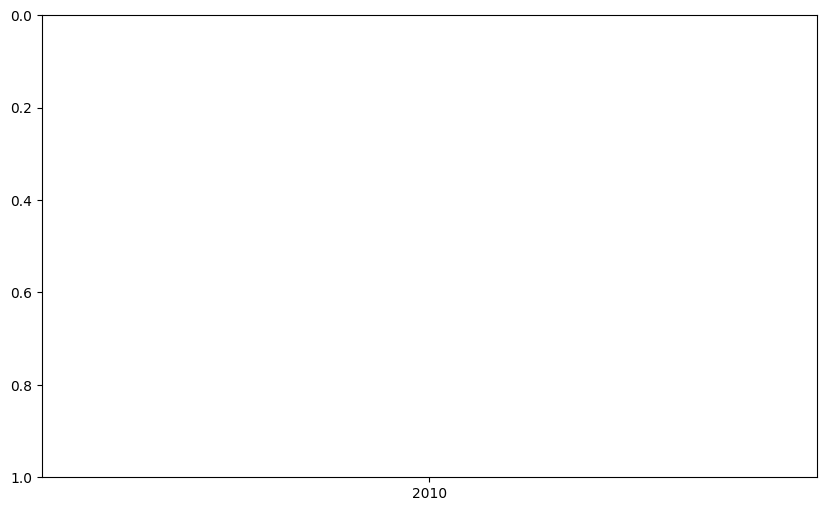

In [ ]:
# grafico los datos en un line plot

# Transformar el DataFrame para que sea más fácil graficar
consultas_melted = consultas_filtrado.melt(id_vars=['jurisdiccion_nombre'], var_name='Año', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Valor', hue='jurisdiccion_nombre', data=consultas_melted, marker='o')

plt.title('Evolución de valores por provincia')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend(title='Provincia')
plt.grid()
plt.show()